In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_one import *
from dashboard_two import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [4]:
df = pd.read_csv('../data/main_file_final.csv').drop(['NPIKSEV'],axis=1)
com_col = ['RID','VISCODE2','Phase']
lst = ['AGE','PTGENDER','PTEDUCAT','NPIK9C','NPIK9A','NPIK7','OSA']
df2 = df[com_col + lst].dropna(how='any',axis=0).reset_index(drop=True)
df2

,RID,VISCODE2,Phase,AGE,PTGENDER,PTEDUCAT,NPIK9C,NPIK9A,NPIK7,OSA
0,8,sc,ADNI1,84.5,Female,18.0,0.0,3.0,0.0,0.0
1,8,bl,ADNI1,84.5,Female,18.0,0.0,3.0,0.0,0.0
2,8,m06,ADNI1,84.5,Female,18.0,0.0,3.0,0.0,0.0
3,8,m12,ADNI1,84.5,Female,18.0,0.0,3.0,0.0,0.0
4,8,m36,ADNI1,84.5,Female,18.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6806,7071,bl,ADNI3,71.2,Female,12.0,1.0,3.0,0.0,0.0
6807,7082,sc,ADNI3,60.9,Female,16.0,0.0,2.0,0.0,0.0
6808,7082,bl,ADNI3,60.9,Female,16.0,0.0,2.0,0.0,0.0
6809,7100,sc,ADNI3,72.9,Male,16.0,0.0,3.0,0.0,0.0


In [5]:
df2.describe()

,RID,AGE,PTEDUCAT,NPIK9C,NPIK9A,NPIK7,OSA
count,6811.000000,6811.000000,6811.000000,6811.000000,6811.000000,6811.000000,6811.000000
mean,3128.467039,72.884011,16.106152,0.987667,2.605491,0.283952,0.125826
std,2066.980974,7.016574,2.709592,1.156414,1.037544,0.450947,0.331677
min,8.000000,50.400000,8.000000,0.000000,1.000000,0.000000,0.000000
25%,1004.000000,68.200000,14.000000,0.000000,2.000000,0.000000,0.000000
50%,4114.000000,73.000000,16.000000,1.000000,3.000000,0.000000,0.000000
75%,4730.000000,77.900000,18.000000,2.000000,3.000000,1.000000,0.000000
max,7100.000000,90.300000,20.000000,5.000000,4.000000,1.000000,1.000000


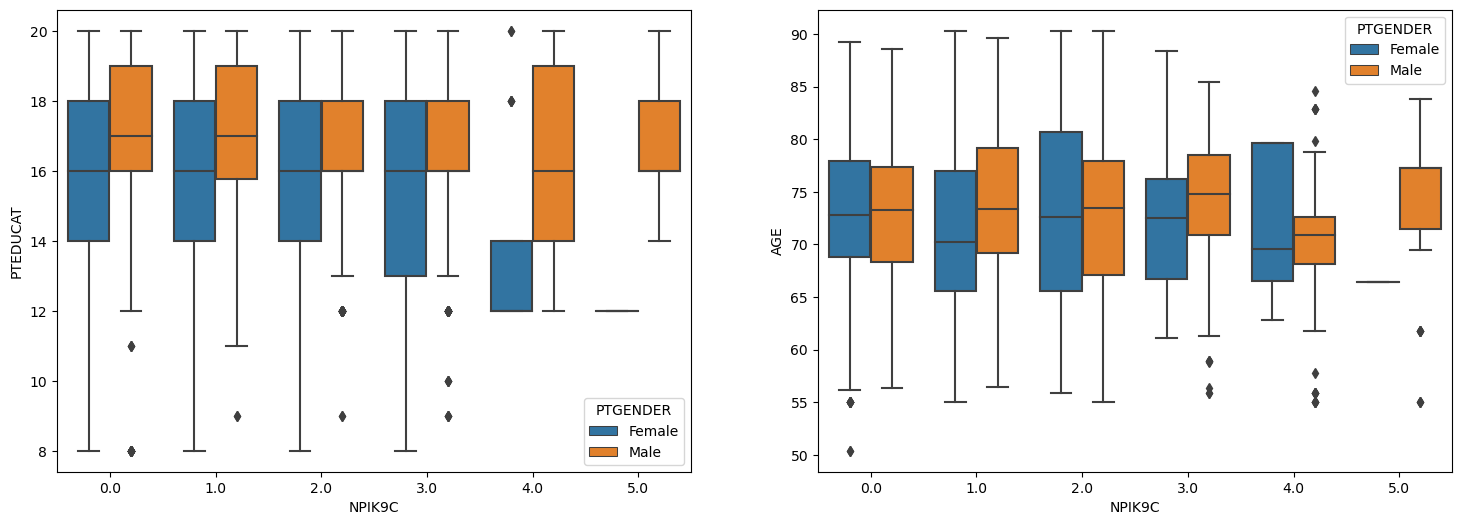

In [8]:
#lst = ['NPIK9C','NPIK9A','NPIK7','OSA']

lst = ['PTEDUCAT','AGE']
target = 'NPIK9C'

f,axes = plt.subplots(nrows = len(lst)//2 ,ncols=2,figsize=(18,6))
axes = axes.ravel()
#labels = [1,2,3,4,5,6,7,8]
for i in range(len(lst)):
    ax = sns.boxplot(data=df2, y=lst[i],x= target,hue='PTGENDER',ax = axes[i])
for ax in f.axes: # rotate x ticks
    #ax.set_xticks(rotation=45, ha='right')
    #ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.tick_params(axis='x',labelrotation=0)

In [9]:
df2.columns

Index(['RID', 'VISCODE2', 'Phase', 'AGE', 'PTGENDER', 'PTEDUCAT', 'NPIK9C',
       'NPIK9A', 'NPIK7', 'OSA'],
      dtype='object')

In [10]:
rus = RandomUnderSampler(random_state=432)
df_gender, y_unsampled = rus.fit_resample(df2, df2['PTGENDER'])
df_gender

,RID,VISCODE2,Phase,AGE,PTGENDER,PTEDUCAT,NPIK9C,NPIK9A,NPIK7,OSA
0,8,sc,ADNI1,84.5,Female,18.0,0.0,3.0,0.0,0.0
1,8,bl,ADNI1,84.5,Female,18.0,0.0,3.0,0.0,0.0
2,8,m06,ADNI1,84.5,Female,18.0,0.0,3.0,0.0,0.0
3,8,m12,ADNI1,84.5,Female,18.0,0.0,3.0,0.0,0.0
4,8,m36,ADNI1,84.5,Female,18.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6697,6877,bl,ADNI3,79.7,Male,16.0,1.0,3.0,0.0,0.0
6698,6681,bl,ADNI3,64.8,Male,16.0,2.0,2.0,0.0,0.0
6699,751,m66,ADNI1,70.9,Male,16.0,3.0,3.0,0.0,0.0
6700,2304,m12,ADNIGO,61.3,Male,17.0,1.0,2.0,0.0,0.0


In [11]:
df_gender.groupby('PTGENDER').count()

,RID,VISCODE2,Phase,AGE,PTEDUCAT,NPIK9C,NPIK9A,NPIK7,OSA
PTGENDER,,,,,,,,,
Female,3351,3351,3351,3351,3351,3351,3351,3351,3351
Male,3351,3351,3351,3351,3351,3351,3351,3351,3351


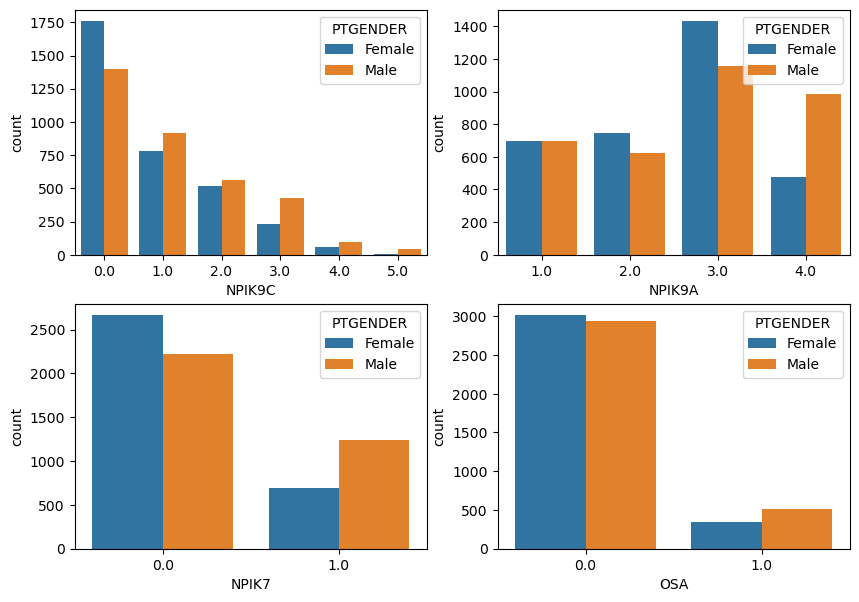

In [12]:
lst = ['NPIK9C','NPIK9A','NPIK7','OSA']
f,axes = plt.subplots(nrows = len(lst)//2,ncols=2,figsize=(10,7))
axes = axes.ravel()
for i in range(len(lst)):
    ax = sns.countplot(data=df2, hue='PTGENDER',x= lst[i],ax = axes[i])
    sns.move_legend(ax, "upper right")

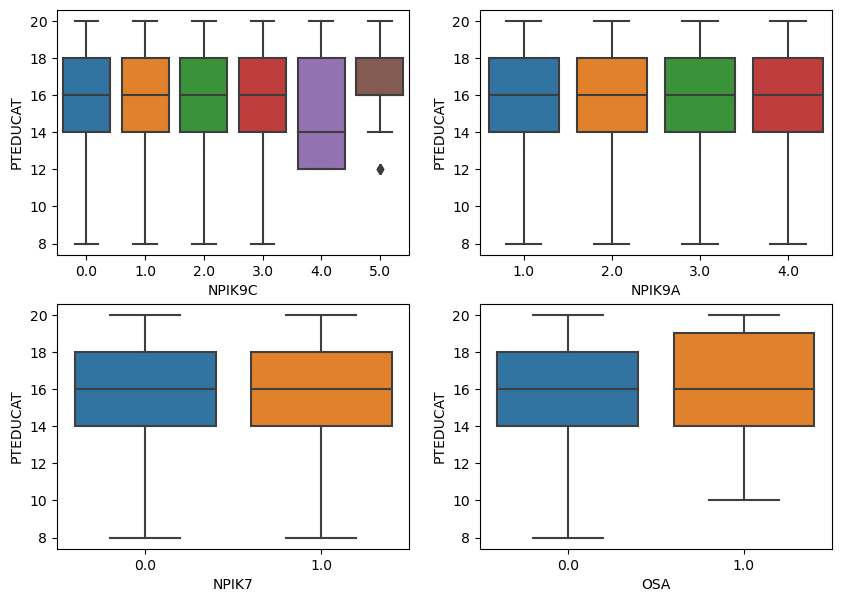

In [13]:
target = 'PTEDUCAT'
f,axes = plt.subplots(nrows = len(lst)//2 ,ncols=2,figsize=(10,7))
axes = axes.ravel()
for i in range(len(lst)):
    ax = sns.boxplot(data=df2, y=target,x= lst[i],ax = axes[i])

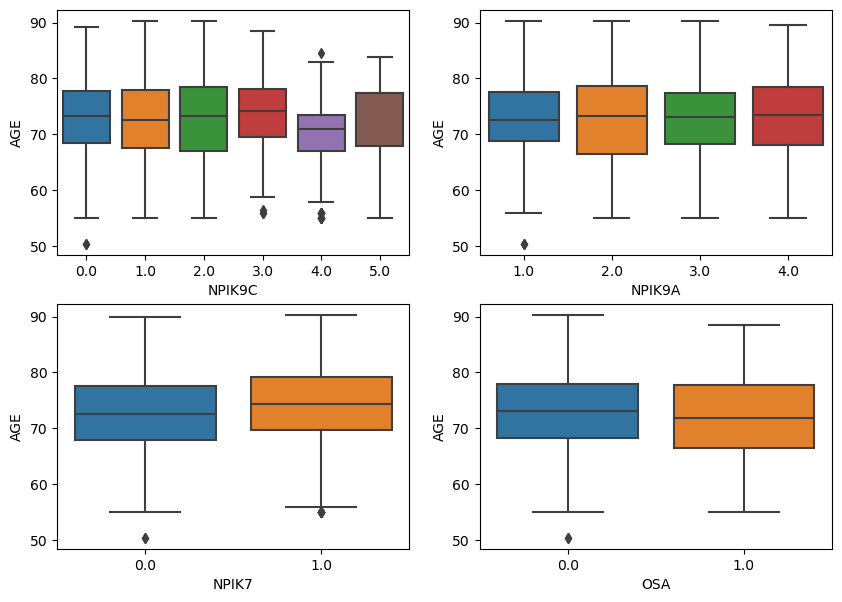

In [14]:
target = 'AGE'
f,axes = plt.subplots(nrows = len(lst)//2 ,ncols=2,figsize=(10,7))
axes = axes.ravel()
for i in range(len(lst)):
    ax = sns.boxplot(data=df2, y=target,x= lst[i],ax = axes[i])